In [1]:
import numpy as np 
import sympy as sy 
import matplotlib.pyplot as plt 
import scipy.optimize as sc
import sys
import time 
%matplotlib inline 

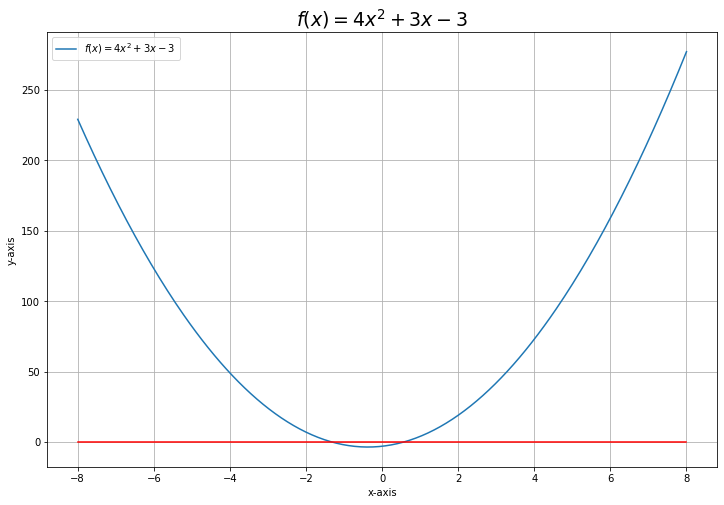

In [2]:
x = np.linspace(-8,8,300)

y = 4*x**2+3*x-3

fig = plt.subplots(figsize=(12,8))
plt.plot(x,y,label = '$f{(x)} = 4x^2+3x-3$')
plt.plot(x,x*0,'r')
plt.title("$f{(x)} = 4x^2+3x-3$",fontsize=19)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.show()

- So, from the graph we can see that the function cross the x-axis and there are two roots of the function.
    - $x = -1.3187293708324432$ & $x = 0.5687291920185089 $
- We will use different methods to find the roots of the function. 

- ### Finding roots using Scipy library

In [3]:

# Algorithms from the scipy library. 
# Scipy is a famous library for scientific computing.
# In this notebook i called it as -> import scipy.optimize as sc 

# These are methods which have been already written in scipy.


f = lambda x:4*x**2+3*x-3


print(sc.bisect(f,0,10))
print(sc.newton(f,9))
print(sc.fsolve(f,-10))
print(sc.fsolve(f,10))



0.5687293044081798
0.5687293044088438
[-1.3187293]
[0.5687293]


## Iterative Method (Fixed point method)

- The iterative method for finding a root for a function f(x) = 0 , is simple you have for example function $f(x) = 4x^2+3x-3$ , you need to write the function in the form of $4x^2+3x-3=0$, and solve for $x$. 
- You can use algebra to solve for $x$ here, for instance we can write the function in term of $x$; $x= \sqrt \frac {3-3x}{4}$
- And then start with an initial guess of $x_i = 0$ in $x= \sqrt \frac {3-3x}{4}$, until $x = x_i$


In [4]:
# iterative method for finding a root for the function f(x) = 4*x**2 + 3*x -3 

xi = 0

for i in range(100):
    x = np.sqrt((3-3*xi)/4)

    error = abs(x-xi)

    if error < 1e-6:
        break 
    xi = x 
print(f"Root is {x} \nNumber of iterations is {i} \nError bound is {error}")

Root is 0.5687289155114058 
Number of iterations is 33 
Error bound is 9.787035545327782e-07


## Bisection Method 

- ####  If we have a lower bound $x_l$ and an upper bound $x_u$, and $f(x_l)f(x_u)$ < 0 we have at least one root.
 - #### Take $x_m = \frac {x_l+xu}{2}$ as the midpoint:
    - If $f(x_l)f(x_m)$< 0 then $x_u$ = $x_m$ and $x_l$ remains the same.so, there is a root in ($x_l$,$x_m$).
    - If $f(x_l)f(x_m)$>0 then $x_l = x_m$ and $x_u$ remains the same. so, there is a root in $(x_m,x_u)$


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgXZm-YzayZb38xF7kanN5dsYzOjEKsoE7wA&usqp=CAU)

In [5]:
def my_bisection(f,x1,x2,tol=1e-6):
    f1 = f(x1)
    f2 = f(x2)

    if f1*f2> 0:
        raise Exception("Error,x1 and x2 must have different signs")

    for i in range(1,101):
        xm = (x1+x2)/2
        fm = f(xm)
        f1 = f(x1)

        error = x2 - x1
        
        if abs(f1) < tol:
            break

        if f1*fm<0:
            x2 = xm 
        else:
            x1 = xm 

    print(f"Root is {(x1)} \nNumber of iterations is {i} \nError is {error}")




my_bisection(f1,0,10)
print("Scipy is ",sc.bisect(f1,0,20))

NameError: name 'f1' is not defined

In [ ]:
# this is the bisection method with while loop 
def bisection_while(f,a,b,tol):
    fa = f(a)
    fb = f(b)

    error = abs(b-a)

    i = 0 

    while error > tol:
        m = (a+b)/2
        fm = f(m)
        if fa * fb>0:
            raise Exception("Error, function does not change signs")

        elif fa*fm < 0:
            b = m 

            error = abs(b-a)

        else:
            a = m
            
            error = abs(b-a)

        i +=1
        m = (a+b)/2

    return (f"Root is x = {m} Number of iterations is  {i} Error is {error}" )


bisection_while(f,0,20,1e-9)


'Root is x = 0.5687293046503328 Number of iterations is  35 Error is 5.820766091346741e-10'

### False Position Method 

- False position method is the same as bisection method, you need to chooese two points that bracket a root,so you need to test the function if it is cross the x-axis in a given interval or not. 

- if $f(a)*f(c)<0$, $b_{new} = c$, $a = a $
- if $f(a)*f(c)>0$, $a_{new} = c$ and $b=b$

![alt text](https://sites.google.com/site/numericalprocesses20161/_/rsrc/1458597081915/home/practice-1/bracketing-methods/false-position/Sin%20t%C3%ADtulo.jpg)

- But how can we find the point $c$ here; note that the slope at f(a) is the same as the slope at f(c) to f(b),hence
 - $c = a - \frac {b-a} {f(b)-f(a)}f(a)$
 - Now we can test the function if it cross the x-axis and compute point c as shown below.

In [ ]:
def my_false_position(f,a,b,tol=1e-9): # here we choose point a and point b 
    fa = f(a)
    fb = f(b)

    for i in range(1000):
        c = a - (f(a)*(b-a)/(f(b)-f(a))) # now we compute the point c 

        fc = f(c)

        if abs(fc) < tol: # here we check if the error is acceptable, tol = 1e-9 
            break 

        elif fa * fb >0: # if the function do not cross the x-axis stop and exit. 
            raise Exception("Error, a and b must have different signs")

        elif fa*fc<0:  # here if the root is in the first half, update b , b_new = c 
            b = c 

        else:  # here if the root is in the second half , update a , a_new = c 
            a = c 
        
    return c,i

print(my_false_position(f,0,10))


(0.5687293042868262, 123)


In [ ]:
# False position with a while loop 
def fp_method(f,x1,x2,tol):

    f1 = f(x1)
    f2 = f(x2)

    if f1*f2 > 0:
            print("Error, x1 and x2 must have different signs")
            sys.exit(1)

    xh_before = 0 
    xh = x2 - (x2-x1)/(f2-f1) * f2
    fh = f(xh)

    i = 0 

    error = abs(xh-xh_before)

    while error > tol:
        xh = x2 - (x2-x1)/(f2-f1) * f2
        fh = f(xh)

        if f1 * fh <0:
            error = abs(xh - x2)
            x2 = xh 
            f2 = fh 
            i +=1

        else :
            error = abs(xh - x1)
            x1 = xh 
            f1 = fh 
            i+=1

    print(f"Root is {xh}.\nNumber of iterations is {i}. \nError is {error}")
    
fp_method(f,0,10,1e-9)


Root is 0.5687292997210207.
Number of iterations is 104. 
Error is 9.381633248040089e-10


## Newton Raphson Method

- Newton-Raphson's method, is a very famous and widely used method for solving nonlinear equations. 
- Compare to the other methods it is the fastest one. 
- ##### $$x_{i+1} = x_i -  \frac {f(x_i)} {f'(x_i)}$$

In [ ]:
# Newton-Raphson method function , using for loop 

def newton_raphson(f,df,x0,tol=1e-6):

    for i in range(100):
        x = x0 - (f(x0))/(df(x0))

        error = abs(x-x0)

        if error <= tol:
            break 

        x0 = x 

    return x,i,error


f = lambda x:4*x**2+3*x-3
df = lambda x:8*x + 3 

sol = newton_raphson(f,df,30) 

print(f"Root is {sol[0]} \nNumber of iterations is {sol[1]} \nError bound {sol[2]}")

Root is 0.5687293044088721 
Number of iterations is 8 
Error bound 2.3180710084780287e-07


In [ ]:
# Newton-Raphson method, using while loop 
# This is the same, but with a while loop
def newton_raphson2(f,df,x0,tol=1e-6):
    i = 0 

    while i<= 100:
        x = x0 - (f(x0))/(df(x0))

        error = abs(x-x0)

        if error < tol:
            break 

        x0 = x 
        i+=1

    return x,i,error

sol2 = newton_raphson2(f,df,30)
print(f"Root is {sol2[0]} \nNumber of iterations is {sol2[1]} \nError bound {sol2[2]}")


Root is 0.5687293044088721 
Number of iterations is 8 
Error bound 2.3180710084780287e-07
